In [1]:
import sys
sys.path.append('C:/Users/TomFi/Desktop/Cours/Projet IA/neuroforest-master')
from typing import List
from pathlib import Path

import json
import numpy as np
from tqdm import tqdm

from neuroforest.dataset import dataloader, TimeStampedCoordinates, SESSION_TYPES, Coordinates

import matplotlib.pyplot as plt


Loading data from : C:\Users\TomFi\Desktop\Cours\Projet IA\data_2022\trajectories


In [8]:
test_path = Path("C:/Users/TomFi/Desktop/Cours/Projet IA/data_2024/trajectories/05ct_uniform0.json")
with test_path.open("r") as f:
    try:
        test_data = json.load(f)
        print(json.dumps(test_data, indent=4))
    except json.JSONDecodeError as e:
        print(f"JSONDecodeError: {e}")

JSONDecodeError: Expecting ',' delimiter: line 1 column 75642 (char 75641)


In [2]:
def to_vect(coordinates: List[Coordinates]) -> np.ndarray:
    return np.array([coord.to_vect() for coord in coordinates])


def get_idle_segments_lengths(player_coords: List[TimeStampedCoordinates]) -> list[int]:
    coords = to_vect([c["coord"] for c in player_coords])
    deriv = coords[1:] - coords[:-1]
    player_dist = np.linalg.norm(deriv, axis=1)
    zero_indices = np.where(player_dist == 0)[0]
    zero_indices_segments = np.split(zero_indices, np.where(np.diff(zero_indices) != 1)[0] + 1)
    return [a.shape[0] for a in zero_indices_segments]


all_lengths = []
for sample in tqdm(dataloader):
    for session_type in SESSION_TYPES:
        all_lengths += get_idle_segments_lengths(sample[session_type].player_coords)

  0%|          | 0/41 [00:00<?, ?it/s]


C:\Users\TomFi\Desktop\Cours\Projet IA\data_2022\trajectories\Ines_uniform0.json


JSONDecodeError: Expecting ',' delimiter: line 1 column 74388 (char 74387)

In [30]:
np.mean(all_lengths)

51.8811986863711

Text(0, 0.5, "Quantité dans l'ensemble du dataset")

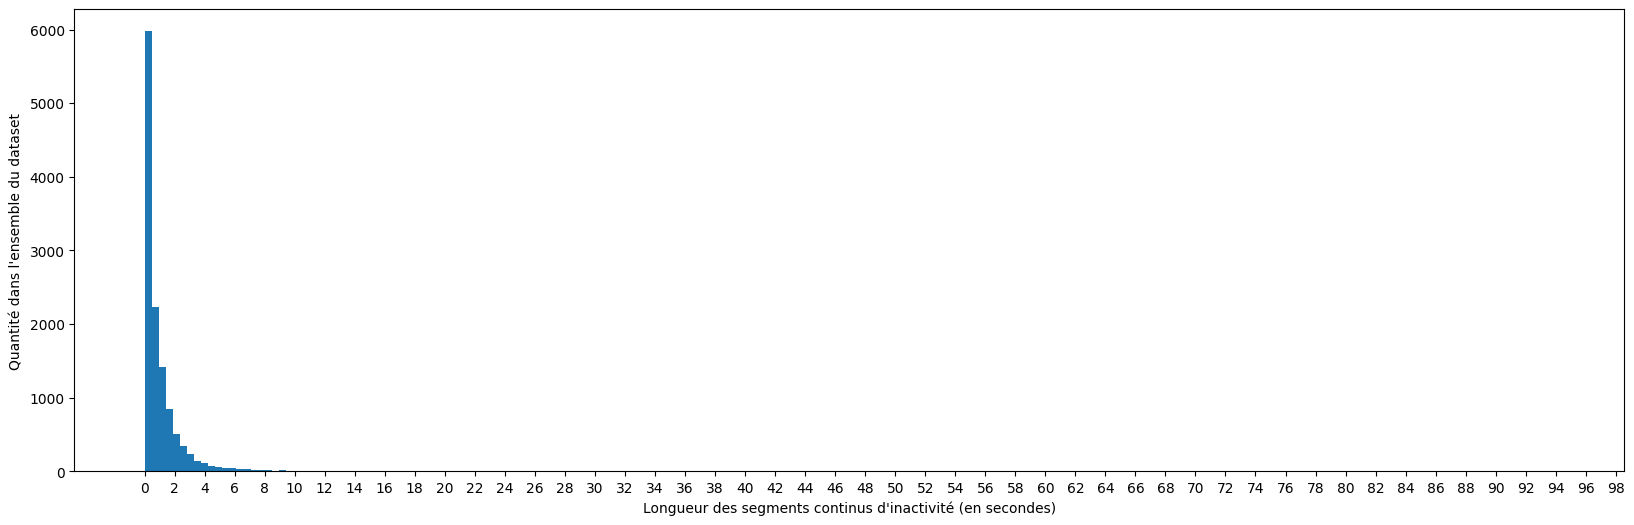

In [46]:
# x samples / (50 samples / sec) -> y sec
x = np.array(all_lengths) / 50
x = x[x < 100]
plt.figure(figsize=(20, 6))
plt.hist(x, bins=200)
plt.xticks(np.arange(0, 100, 2))
plt.yscale("log")
plt.xlabel("Longueur des segments continus d'inactivité (en secondes)")
plt.ylabel("Quantité dans l'ensemble du dataset")

In [15]:
np.histogram(np.array(all_lengths), bins=np.linspace(0, 300, 49))
all_lengths

[1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,


100%|██████████| 37/37 [00:06<00:00,  6.13it/s]
/tmp/ipykernel_69546/1682791836.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


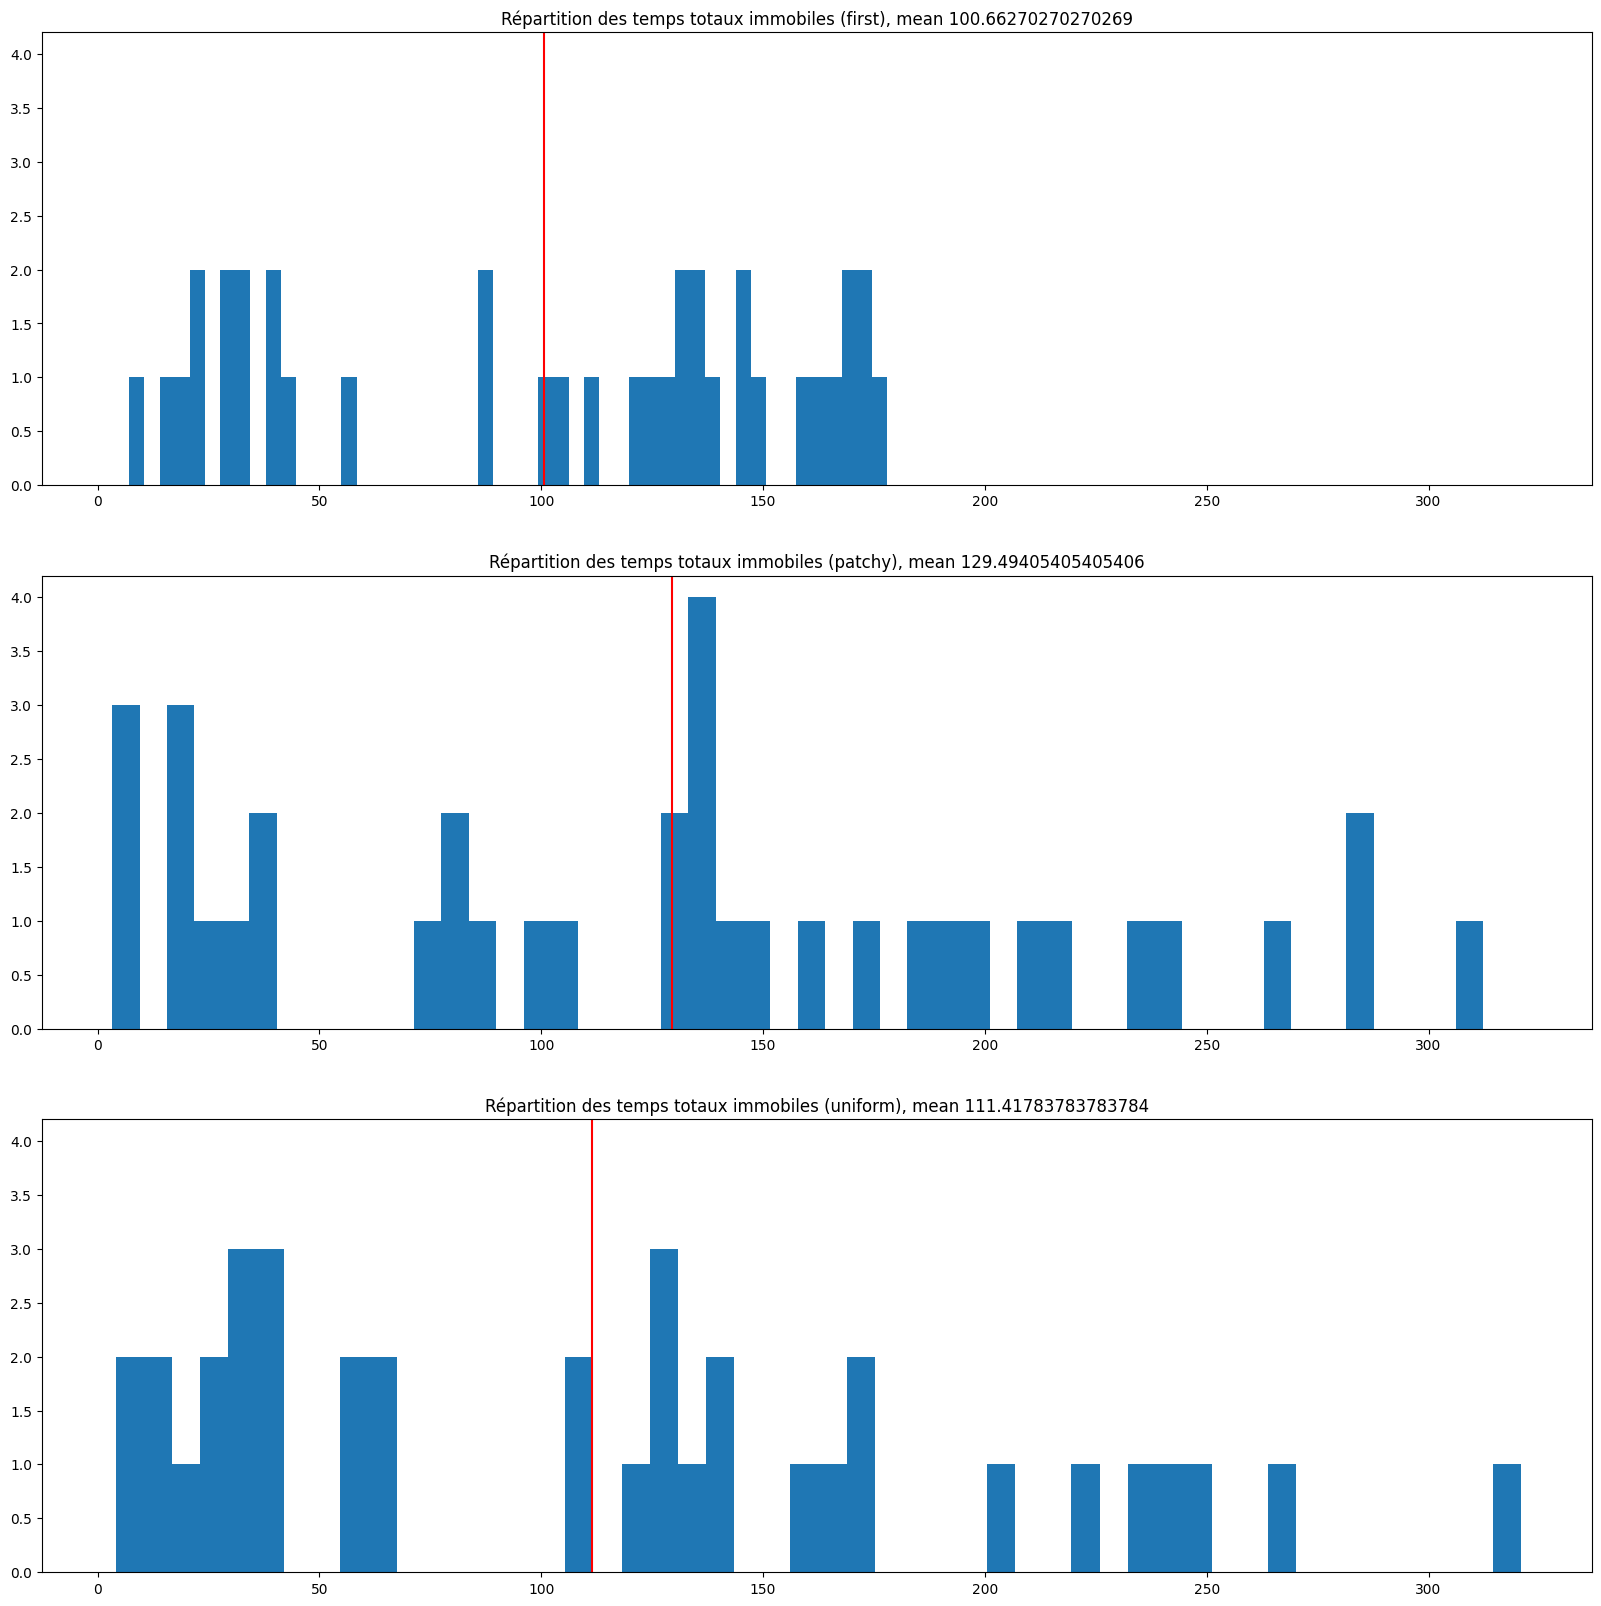

In [45]:
def compute_total_static_time(player_coords: List[TimeStampedCoordinates]):
    coords = to_vect([c["coord"] for c in player_coords])
    deriv = coords[1:] - coords[:-1]
    player_dist = np.linalg.norm(deriv, axis=1)
    return (player_dist == 0).sum() / 50  # 50 is the amount of samples / s


fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 20))
for session_type, ax in zip(SESSION_TYPES, axs):
    all_static_times = []
    for sample in tqdm(dataloader):
        all_static_times.append(compute_total_static_time(sample[session_type].player_coords))
    ax.hist(all_static_times, bins=50)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.axvline(x=np.mean(all_static_times), color="red")
    ax.set_title(f"Répartition des temps totaux immobiles ({session_type}), mean {np.mean(all_static_times)}")
fig.show()
